# Introdução à Musicologia Computacional

Pedro A. S. O. Neto, <em>M.Sc.</em>

## Estrutura da apresentação

- Representações musicais
- Aplicações
- Considerações finais

# Representações musicais

- Numérica
- Simbólica
- Acústica

# Aplicações

- Síntese
- Análise
- História

# Considerações finais

- Acessibilidade
- Praticidade
- Poder analitico

In [128]:
options(warn = -1)
require("seewave")
require("phonTools")
require("shiny")
require("data.table")
require("IRdisplay")
require("dplyr")
require("reshape2")
require("plyr")
require("ggplot2")
require("gridExtra")
require("tuneR")

# Representações

- Exemplo 1. Gerando sons

In [129]:
#Parâmetros
frequencia1 = 200; frequencia2 = 500

#Defining sinewaves:
som1 = sinusoid(frequencia1, amps = 10, dur = 2000, fs = 22050, sum = FALSE, 
          show = FALSE, colors = NULL)

som2 = sinusoid(frequencia2, amps = 10, dur = 2000, fs = 22050, sum = FALSE, 
          show = FALSE, colors = NULL)

# Representações

- Ouvindo os sons

In [130]:
shiny::tags$audio(src = 'som1.wav', controls = NA)
shiny::tags$audio(src = 'som2.wav', controls = NA)

Shiny tags cannot be represented in plain text (need html)

Shiny tags cannot be represented in plain text (need html)

## Visualizando sons

- Exemplo 1. Representação numérica


In [131]:
som1$wave1[1:15]
som2$wave1[1:15]

[1] 0.000000 0.569595 1.137340 1.701393 2.259921 2.811111 3.353173 3.884348
 [9] 4.402910 4.907176 5.395507 5.866320 6.318085 6.749334 7.158668

[1] 0.000000 1.419943 2.811111 4.145312 5.395507 6.536363 7.544759 8.400259
 [9] 9.085528 9.586679 9.893554 9.999937 9.903670 9.606704 9.115059

# Visualizando sons

- Exemplo 1. Representação gráfica

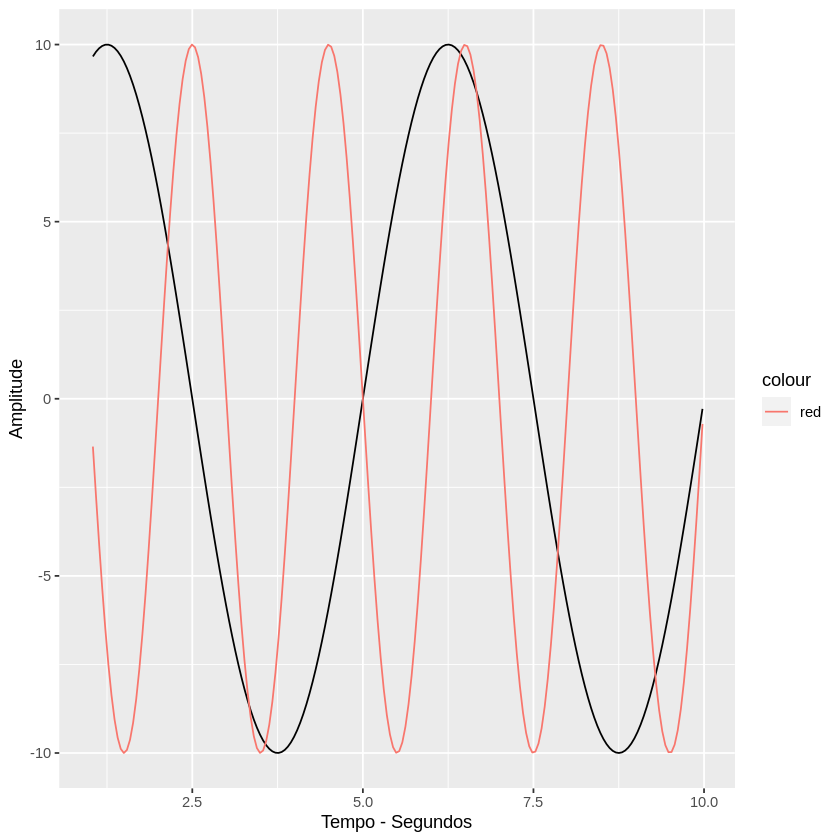

In [132]:
ggplot(data = som1, aes(x = time, y = wave1))+
       geom_line()+ xlim(c(1, 10))+
       geom_line(data = som2, aes(x = time, y = wave1, colour = 'red'))+
       ylab("Amplitude")+ xlab("Tempo - Segundos")

# Visualizando sons

- Exemplo 1. Espectrograma

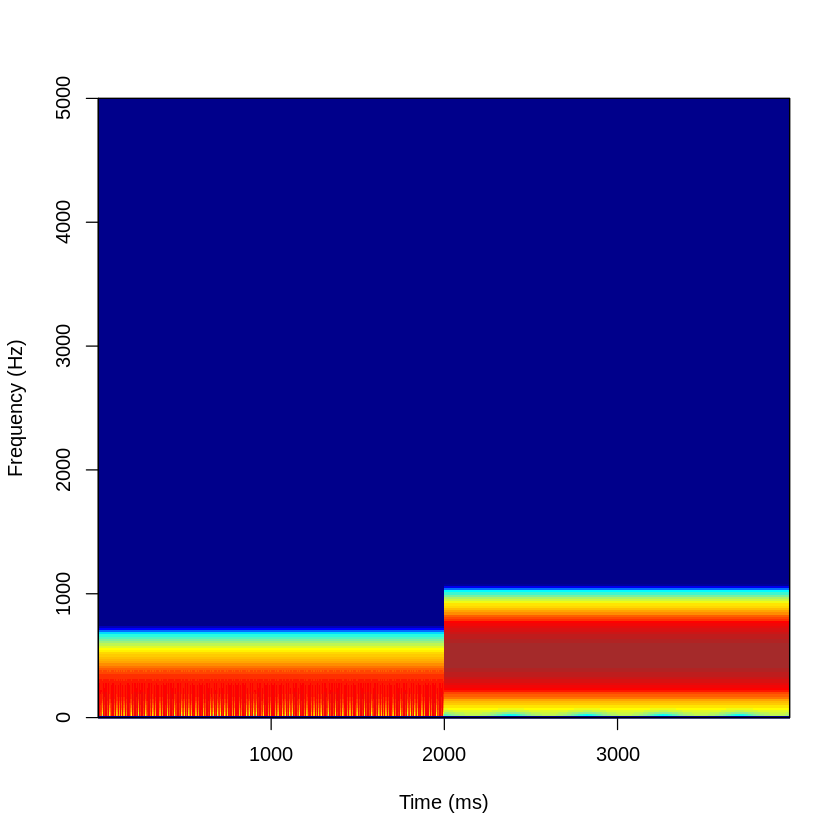

In [133]:
phonTools::spectrogram(sound = c(som1$wave1, som2$wave1))

# Visualizando sons

- Exemplo 2

In [159]:
voz = tuneR::readWave(filename = "voz.wav")

In [160]:
shiny::tags$audio(src = 'voz.wav', controls = NA)

Shiny tags cannot be represented in plain text (need html)

# Visualizando sons

- Exemplo2. Representação numérica

In [161]:
voz = voz@left + voz@right
voz[1:19]

[1]  -9 -14 -18 -21 -23  -7   4  -6 -21 -14 -17 -12 -15  -2   3  12   1  13  -2

# Visualizando sons

- Exemplo2. Representação gráfica

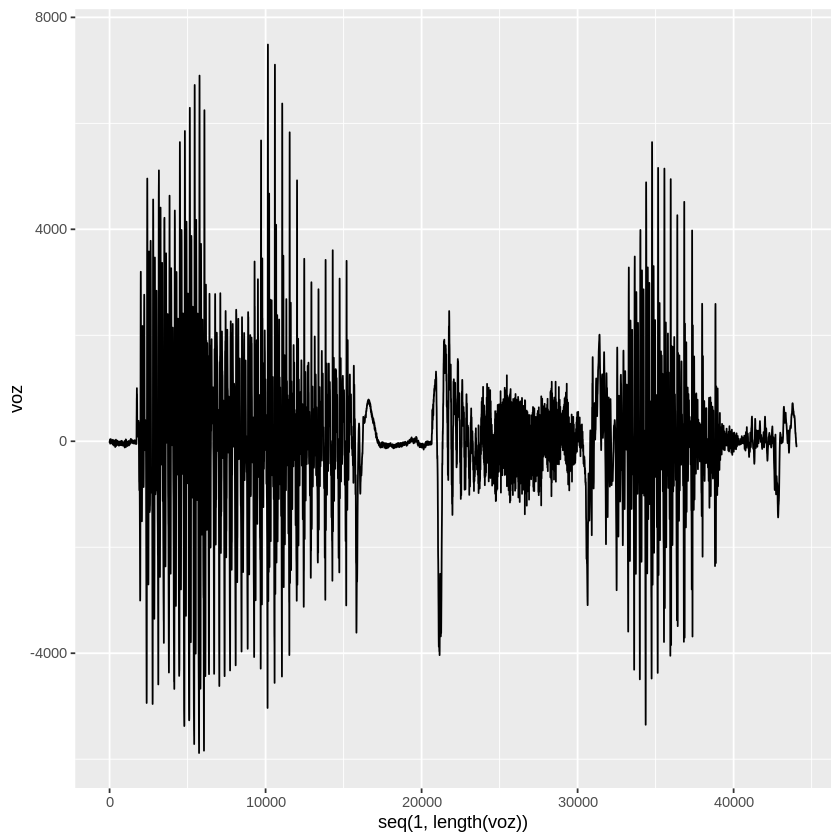

In [137]:
ggplot(data = data.frame(voz = voz), aes(x = seq(1, length(voz)), y = voz))+
       geom_line()

# Visualizando sons

- Exemplo 2. Espectrograma

[1]  -9 -14 -18 -21 -23  -7   4  -6 -21 -14 -17 -12 -15  -2   3  12   1  13  -2

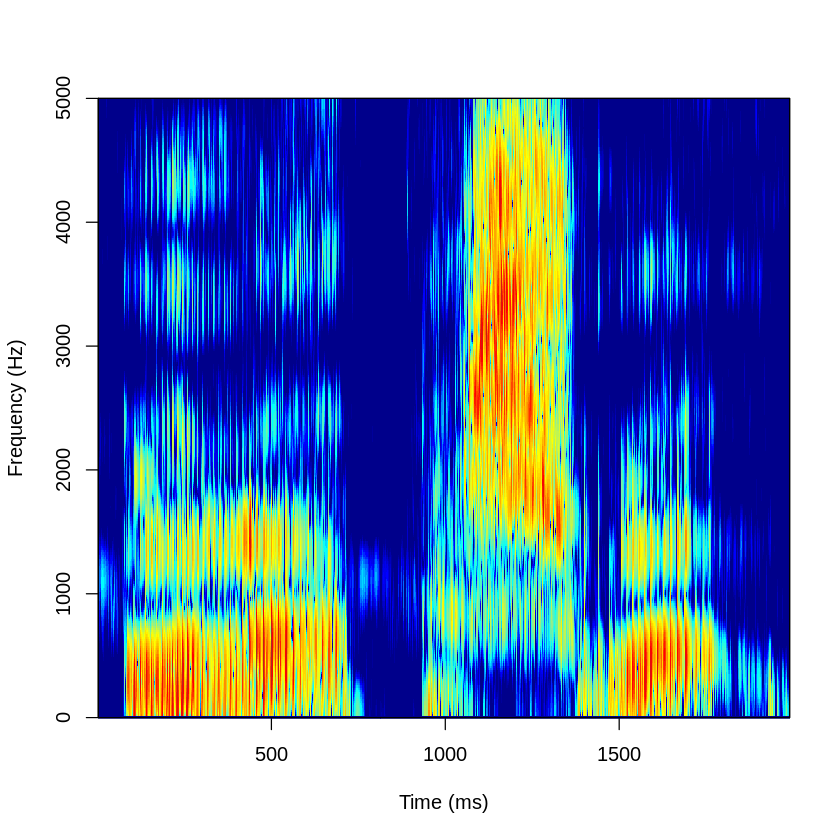

In [163]:
phonTools::spectrogram(sound = voz)
voz[1:19]

# Representações

- Exemplo 1. Simbólica

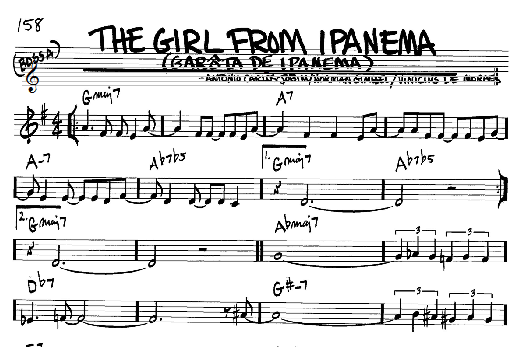

In [139]:
display_png(file = "sheet.png")

In [140]:
# Midi
garota = tuneR::readMidi(file = "girl.mid")

#Notas
garota$parameter1[tuneR::readMidi(file = "girl.mid")['event'] == "Note On"]

#Tempo (ms)
garota$time[tuneR::readMidi(file = "girl.mid")['event'] == "Note On"]

[1] 69 66 66 64 69 66 66 66 64 69 66 66 64 69 69 66 66 66 64 67

[1]    0  720  960 1200 1680 2400 2640 3120 3360 3600 4320 4800 5280 5520 6000
[16] 6240 6480 6960 7200 7440

# Aplicações

# Análises comparativas

- Performance
- Linha temporal
- Repertório

In [141]:
bach = fread("bach.csv")

bach = plyr::ddply(bach, c('artista'), summarise,
                        
                        em = sd(energy),
                        energy = mean(energy),
                        tm = sd(tempo),
                        tempo = mean(tempo),
                        lm = sd(loudness),
                        loudness = mean(loudness),
                        vm = sd(valence),
                        valence = mean(valence)
)

bach = reshape2::melt(bach, 
                      measure.vars = c("energy", "tempo", "loudness", "valence",
                                      "em", "tm", "lm", "vm"))

bach = data.frame(feature = bach[1:8, ]$variable,
           value = bach[1:8, ]$value,
           sd = bach[9:16, ]$value,
           artista = bach[1:8, ]$artista)

# Análises comparativas

- Exemplo 1. Bach (João Carlos Martins e Arthur Loesser)

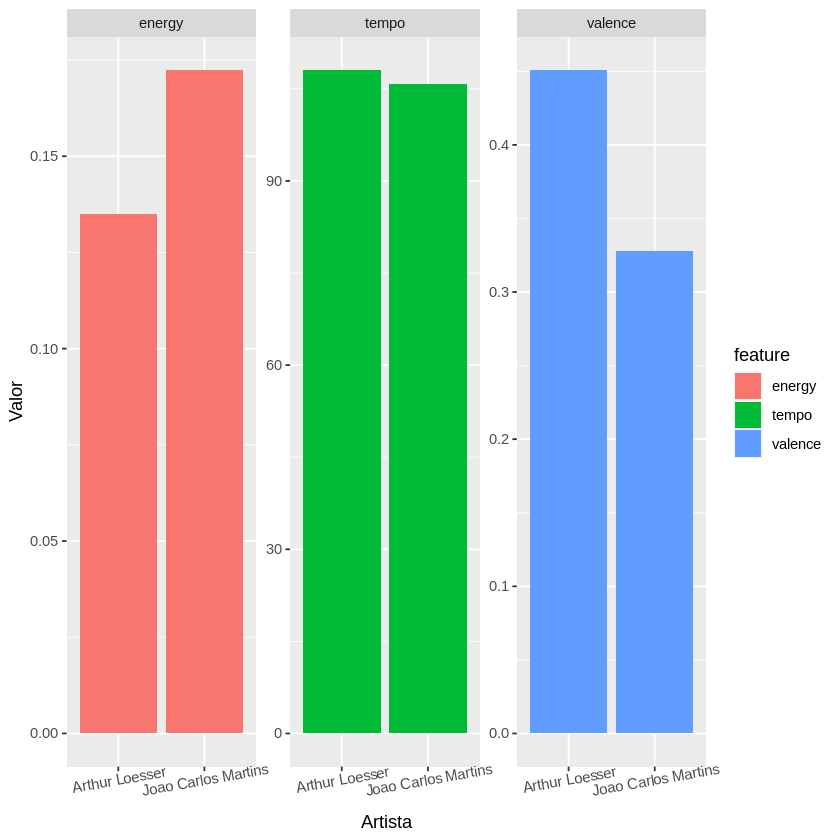

In [157]:
ggplot(data = filter(bach, bach$feature != 'loudness'),aes(x= as.factor(artista), 
    y=value, fill = feature))+ facet_wrap(~feature, scales = "free")+
    geom_bar(stat = 'identity', position = position_dodge(0.7))+
    ylab('Valor')+ xlab('Artista') + theme(axis.text.x = element_text(angle = 10))

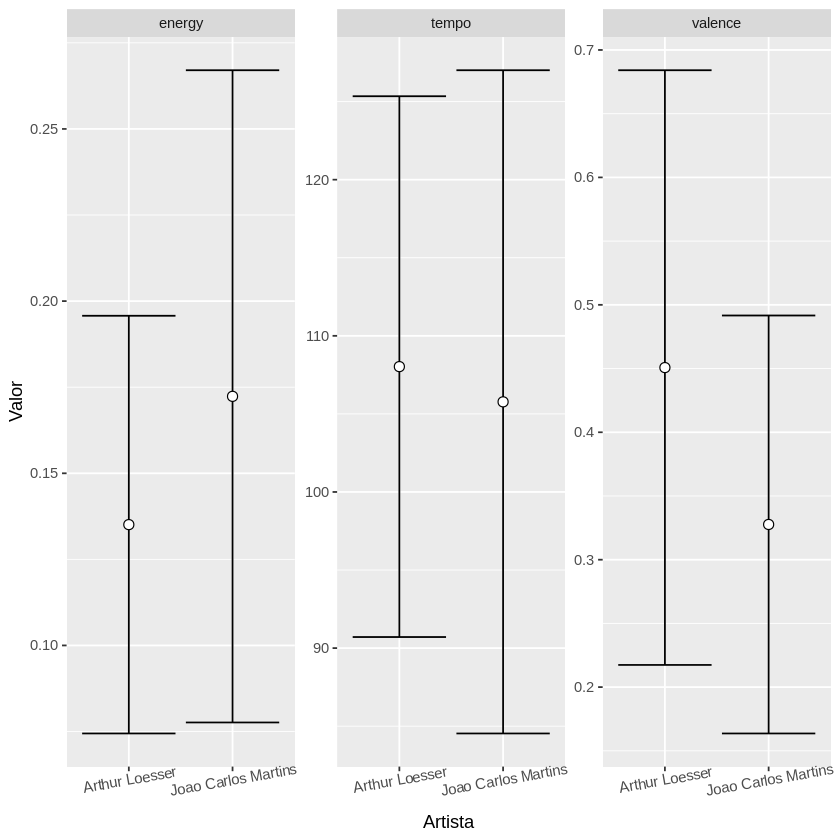

In [143]:
ggplot(data = filter(bach, bach$feature != 'loudness'), aes(x= as.factor(artista), 
    y=value, fill = feature))+ facet_wrap(~feature, scales = "free")+
    geom_errorbar(aes(ymin=value-sd, ymax=value+sd), position=position_dodge(0.5)) +
    geom_point(shape = 21, size = 2.5, position=position_dodge(0.5), fill = 'white')+
    ylab('Valor')+ xlab('Artista') + theme(axis.text.x = element_text(angle = 10))

## Análises comparativas

- Exemplo 2. Cool vs Hardbop

In [144]:
jazz = fread("jazz.csv")
jazz = plyr::ddply(jazz, c('artista'), summarise,
                             em = sd(energy),
                             energy = mean(energy),
                             tm = sd(tempo_x),
                             tempo = mean(tempo_x),
                             lm = sd(loudness_x),
                             loudness = mean(loudness_x),
                             vm = sd(valence),
                             valence = mean(valence))
jazz = reshape2::melt(jazz,
                      measure.vars = c("energy", "tempo", "loudness", "valence",
                                      "em", "tm", "lm", "vm"))

jazz = data.frame(feature = jazz[1:8, ]$variable,
           value = jazz[1:8, ]$value,
           sd = jazz[9:16, ]$value,
           artista = jazz[1:8, ]$artista)

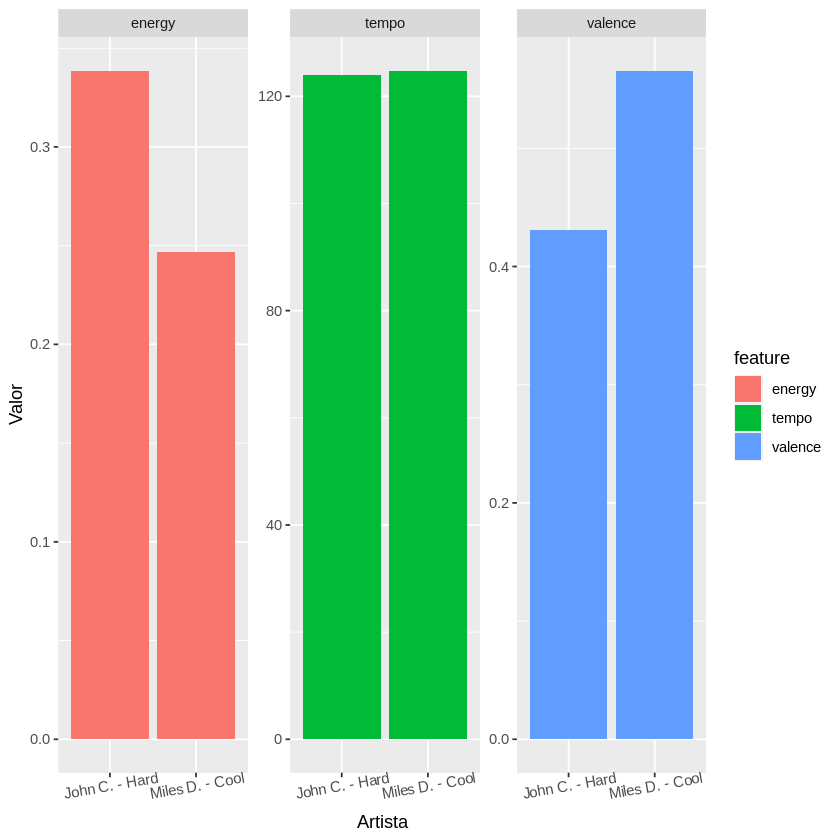

In [145]:
ggplot(data = filter(jazz, jazz$feature != 'loudness'), 
    aes(x= as.factor(artista), y=value, fill = feature))+ 
    facet_wrap(~feature, scales = "free")+ geom_bar(stat = 'identity', 
    position = position_dodge(0.7))+ ylab('Valor')+ xlab('Artista') +
    theme(axis.text.x = element_text(angle = 10))

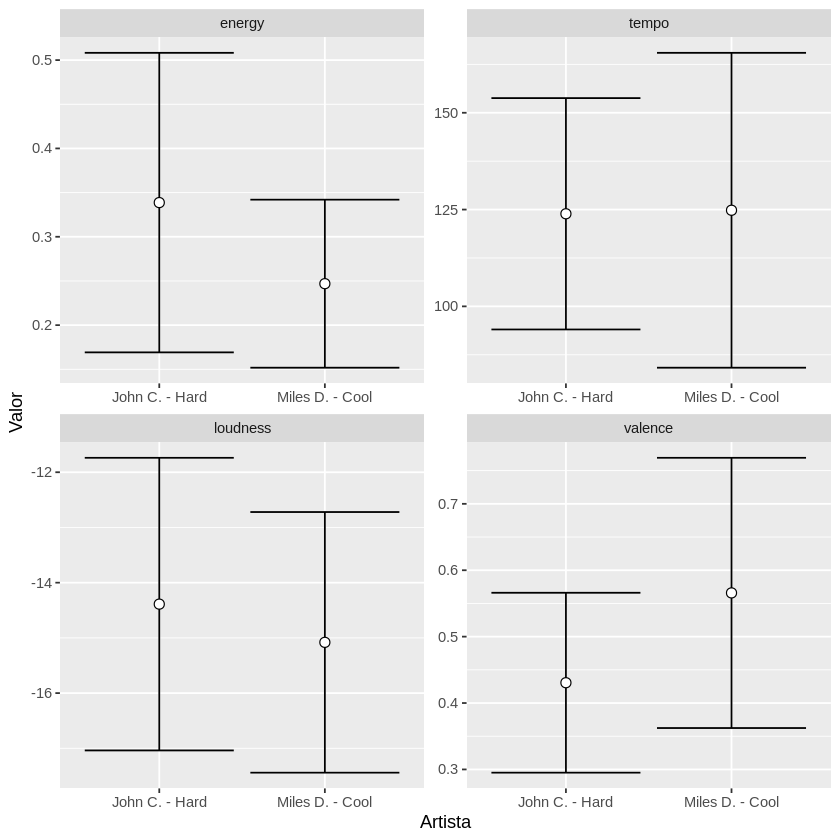

In [146]:
ggplot(data = jazz, aes(x= as.factor(artista), y=value, fill = feature))+
    facet_wrap(~feature, scales = "free")+
    geom_errorbar(aes(ymin=value-sd, ymax=value+sd), position=position_dodge(0.5)) +
    geom_point(shape = 21, size = 2.5, position=position_dodge(0.5), fill = 'white')+
    ylab('Valor')+ xlab('Artista')

# Análises comparativas

- Exemplo2. Cool vs Hardbop (Troca de acordes)

In [153]:
contagem_alt = function(x){
    count = 0
    for(i in 2:length(x)){
      if(x[i-1] != x[i]){
          count = count + 1
      }  
    }
    return(count)
}
    
jazz = fread("jazz.csv")
jazz = plyr::ddply(jazz, c('artista'), summarise,
                             key_confidence = mean(key_confidence),
                             mudancas_key = contagem_alt(key_y)
                  )
                             
jazz = reshape2::melt(jazz,
                      measure.vars = c("mudancas_key", "key_confidence"))


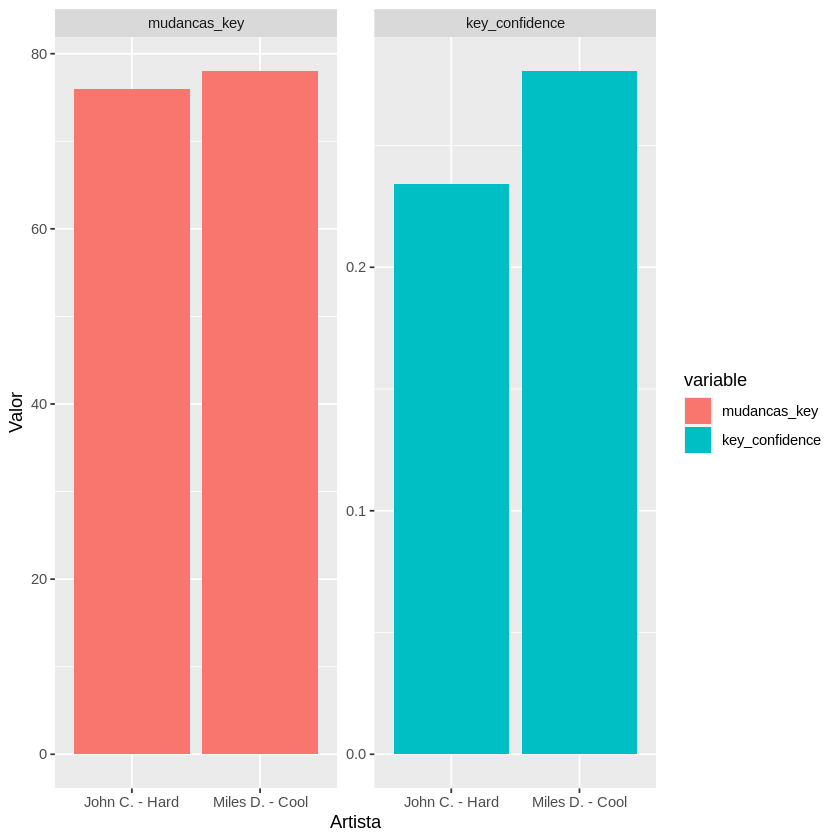

In [156]:
ggplot(data = jazz, aes(x= as.factor(artista), y=value, fill = variable))+
    facet_wrap(~variable, scales = "free")+
    geom_bar(stat = 'identity', position = position_dodge(0.7))+
    ylab('Valor')+ xlab('Artista')

## Análises comparativas

- Exemplo 3. Linha temporal

In [164]:
erudito = fread("erudito.csv")
erudito = plyr::ddply(erudito, c('artista'), summarise,
                             energy = mean(energy),
                             tempo = mean(tempo),
                             loudness = mean(loudness),
                             valence = mean(valence),
                             key_confidence = mean(key_confidence)
                      )
erudito = reshape2::melt(erudito, 
                      measure.vars = c("energy", "tempo", "loudness", 
                                       "valence", "key_confidence"))

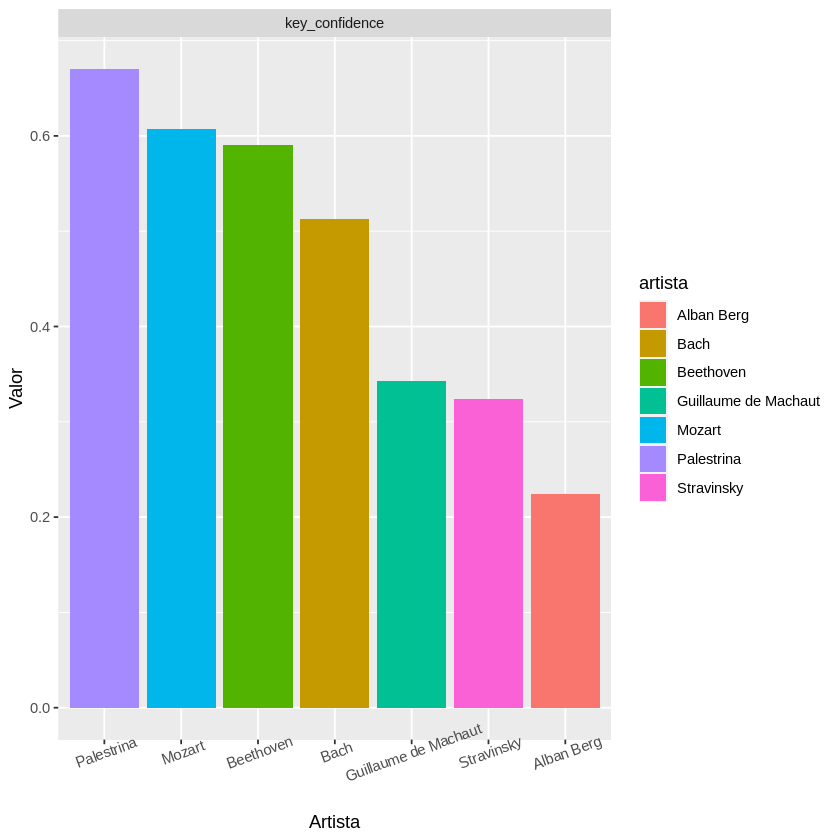

In [165]:
ggplot(data = dplyr::filter(erudito, variable == "key_confidence"), 
    aes(x= reorder(as.factor(artista), -value), y=value, fill = artista))+
    facet_wrap(~variable, scales = "free") +
    geom_bar(stat = 'identity', position = position_dodge(0.7)) +
    ylab('Valor') + theme(axis.text.x = element_text(angle = 20))+ xlab('Artista')

# Considerações finais

- SBCM - Simpósio Brasileiro de Computação Musical
- ISMIR - International Society for Music Information Retrieval
- NESCoM (UFES); Grupo de Computação Musical - IME/USP, MusMat

# Considerações finais

- Acessibilidade

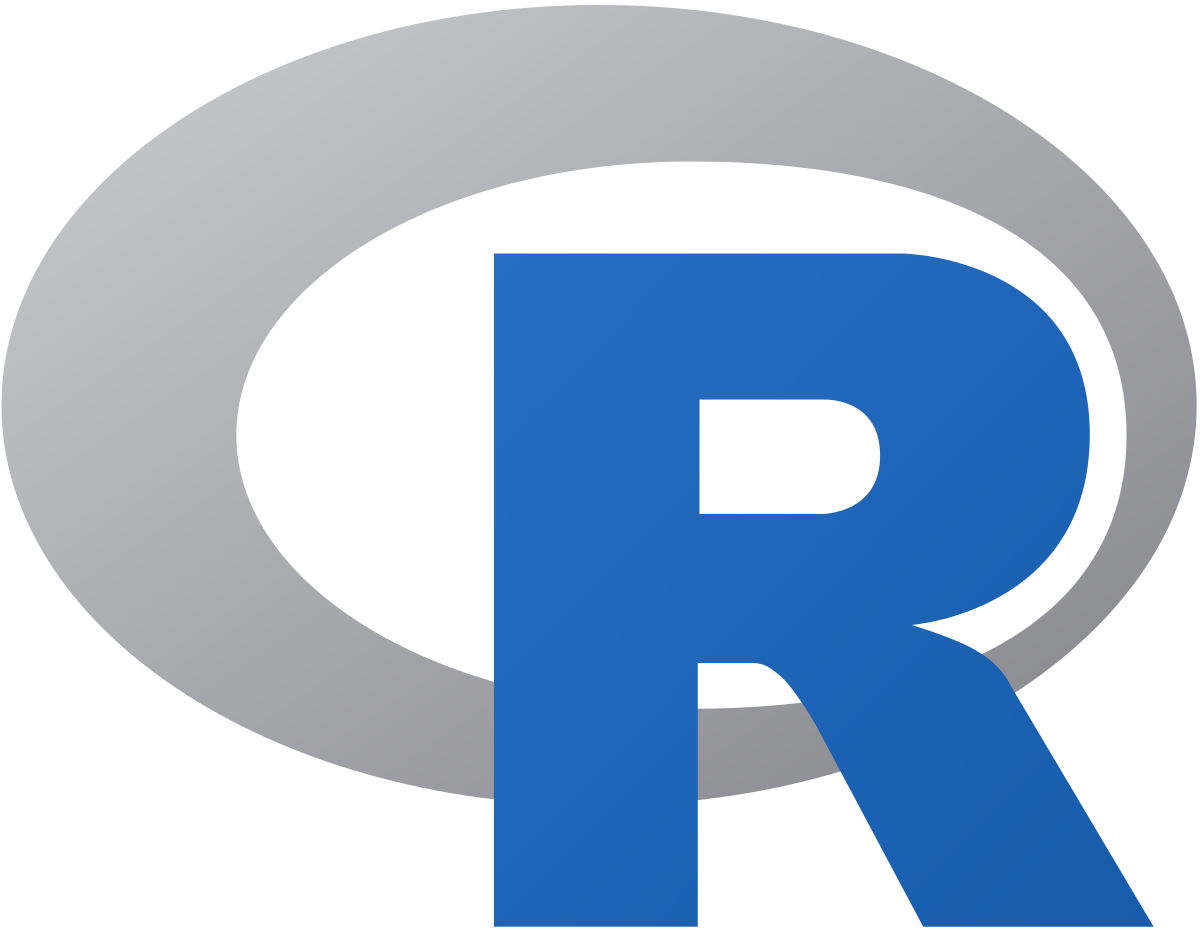

In [149]:
display_png(file = "r.png", width = "20%")

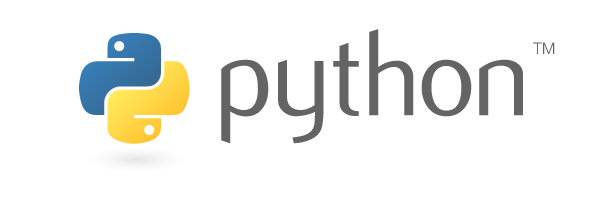

In [150]:
display_png(file = "python.png", width = "30%")

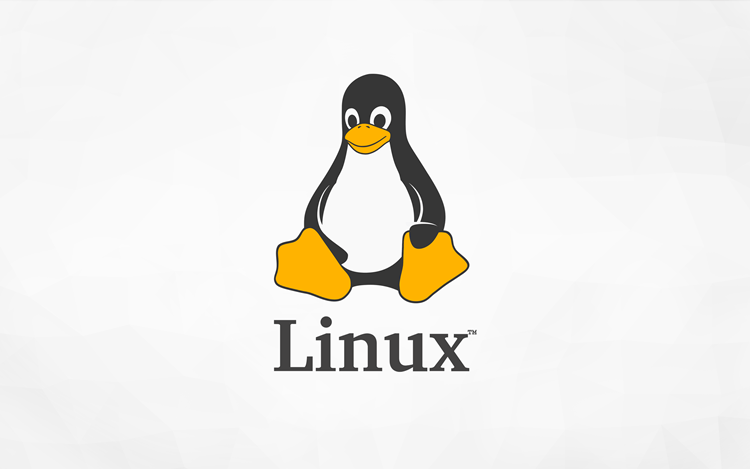

In [151]:
display_png(file = "linux.png", width = "50%")

# Considerações finais

- Continuação

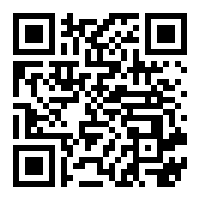

In [152]:
display_png(file = "qrcode.png", width = "30%")

# Obrigado!

Pedro A. S. O. Neto, <em>M.S.</em> <br>
<em>Institudo de Artes, Unicamp - Música </em><br>
<em>Centro de Matemática, Computação e Cognição, UFABC - Neurociência e Cognição </em>

Contato:
pasoneto@gmail.com